## Name: Priyanka Bhatta
## ID: 2060036

# Sentiment Analysis with Recurrent Neural Network

## 1. Data Understanding, Analysis, and Cleaning[5]:

**Importing the necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Tensorflow
import tensorflow as tf

# Keras
import keras 
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.layers import Embedding, TextVectorization

# SkLearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

**Loading the dataset and naming it 'data'**

In [2]:
data = pd.read_csv("rotten_tomatoes_movie_reviews.csv")

**Check the size of the dataset**

In [3]:
print("Number of rows and columns in the dataset:", data.shape)

Number of rows and columns in the dataset: (10662, 2)


**Check for missing values**

In [4]:
print("Number of missing values in the dataset:\n", data.isnull().sum())

Number of missing values in the dataset:
 reviews    0
labels     0
dtype: int64


**Check the distribution of classes**

In [5]:
print("Distribution of classes:\n", data['labels'].value_counts())

Distribution of classes:
 0    5331
1    5331
Name: labels, dtype: int64


### Shuffle up the data

In [6]:
data = data.sample(frac=1, random_state=42)
data.head()

,reviews,labels
6830,"this film seems thirsty for reflection , itsel...",1
8600,the movie's thesis -- elegant technology for t...,1
4080,tries too hard to be funny in a way that's too...,0
3079,disturbingly superficial in its approach to th...,0
582,"an ugly , pointless , stupid movie .",0


# Build the model

### Train Test Split

To build the model, we need to split the data into train and test sets

We take the 'reviews' and 'labels' from the given dataset and converts them into numpy arrays.

Then, we splits the data into training and testing sets with a 15% testing data and a 42 as a random state value.

In [7]:
train_sentences , test_sentences, train_labels , test_labels = train_test_split(data['reviews'].to_numpy(),
                                                                                data['labels'].to_numpy(),
                                                                                test_size=0.15,
                                                                                random_state=42)

Then, we check the length of train and test sentences to verify that the train-test split has been done correctly.

In [8]:
len(train_sentences), len(test_sentences)

(9062, 1600)

## Preprocessing the data

This preprocessing step is necessary to convert the textual data into a numerical format that can be used for training a machine learning model. The TextVectorization layer is used to tokenize the sentences, convert them to lowercase, and remove punctuation and special characters. Additionally, the layer is configured to limit the vocabulary size to the MAX_VOCAB most frequent words, and to pad the sequences to a maximum length of MAX_LEN tokens. This ensures that all input sequences have the same length, which is required by the RNN model.



* **MAX_LEN** is set to 21, which means that any review with more than 21 words will be truncated and any review with less than 21 words will be padded with zeros. 



* **MAX_VOCAB** is set to 10,000, which means that the 10,000 most frequent words will be used to create the vocabulary.



* **max_tokens** specifies the maximum size of the vocabulary


* **output_mode** specifies the output type of the layer (in this case, integer sequences)


* **output_sequence_length** specifies the maximum length of the output sequences.

In [9]:
MAX_LEN = 21
MAX_VOCAB = 10_000 

txt_vect = TextVectorization(max_tokens=MAX_VOCAB,
                            output_mode="int",
                            output_sequence_length=MAX_LEN)

## Adapting vectors to training sentences

In this step, the TextVectorization layer is adapted to the training sentences. This means that the layer is configured to build a vocabulary of up to MAX_VOCAB number of most common words in the training set, and to pad/truncate the sentences to a maximum length of MAX_LEN tokens.

This adaptation step is necessary to ensure that the text data is in a format that can be fed into the deep learning model. By adapting the TextVectorization layer to the training data, we ensure that the same preprocessing steps (such as tokenization and padding) are applied consistently to all the text data, both during training and inference.

In [10]:
# Adapting vectors to train_sentences
txt_vect.adapt(train_sentences)

## Embedding Layer


This layer is used to convert the input text data into a form that can be understood by the model. It maps each word in the input sequence to a fixed-length vector of real numbers. In this case, we're using the Keras `Embedding` layer which takes as input the maximum vocabulary size `MAX_VOCAB`, the output dimension of the embedding `output_dim`, and the input sequence length `input_length`. The output of the embedding layer will be a 3D tensor of shape `(batch_size, sequence_length, output_dim)`.

In this specific example, we're using an embedding dimension of 128.

In [11]:
Embedding = keras.layers.Embedding(input_dim=MAX_VOCAB,
                                   output_dim=128,
                                   input_length=MAX_LEN)

In [12]:
# a random seed to ensure the same results can be obtained every time the code is run.
tf.random.set_seed(42)

#This creates an input layer that expects one string input with one dimension.
inputs = keras.layers.Input(shape=(1, ), dtype="string")

#This applies text vectorization to the input layer.
X = txt_vect(inputs)

#This applies the Embedding layer to the output of the text vectorization layer.
X = Embedding(X)

#This applies a LSTM layer with 64 units to the output of the Embedding layer.
X = LSTM(64)(X)

# This applies a dense layer with one unit and sigmoid activation function to the output of the LSTM layer.
outputs = keras.layers.Dense(1, activation="sigmoid")(X) # 1 output since we are only trying to detect postive or negative (0 or 1)


# Create model
model_0 = tf.keras.Model(inputs, outputs, name="RNN_Sentiment_Classifier")

Now, we print out the summary of the model architecture, including the number of parameters and layers, their shapes, and their output shapes. It provides a concise overview of the model and is helpful for verifying the model's design and ensuring that the input and output shapes are correct.

In [13]:
# Print the model summary
model_0.summary()

Model: "RNN_Sentiment_Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 21)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 21, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
________________________________

## Train the model

Once the model is built, Train your model for as many epochs you think is necessary.
Please, Plot and show training loss/validation loss behaviour for each iterations.

* **model_0.compile()**: This compiles the model with the specified loss function, optimizer and metrics.


* **loss="binary_crossentropy"**: This specifies the loss function as binary cross-entropy, which is commonly used for binary classification problems.


* **optimizer="adam"**: This specifies the optimizer as Adam, which is a popular optimizer for deep learning models.


* **metrics=["accuracy"]**: This specifies the metric to evaluate the model's performance during training as accuracy, which is a common metric for classification problems.

In [14]:
model_0.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics=["accuracy"]) 

* **hist_0** = model_0.fit(): This trains the model on the provided data for the specified number of epochs and returns a history object containing the training metrics.


* **train_sentences**: The input sentences used for training the model.


* **train_labels**: The corresponding labels for the input sentences used for training the model.


* **epochs=5**: The number of times the model will iterate over the entire training set.


* **validation_data=(test_sentences, test_labels)**: The validation data on which the model will be evaluated after each epoch. Here we're using the test set for this purpose.

In [15]:
hist_0 = model_0.fit(train_sentences,
                    train_labels,
                     epochs=5,
                    validation_data=(test_sentences, test_labels))

Epoch 1/5
284/284 [==============================] - 16s 45ms/step - loss: 0.5871 - accuracy: 0.6694 - val_loss: 0.5258 - val_accuracy: 0.7400
Epoch 2/5
284/284 [==============================] - 11s 40ms/step - loss: 0.3317 - accuracy: 0.8575 - val_loss: 0.5428 - val_accuracy: 0.7531
Epoch 3/5
284/284 [==============================] - 12s 41ms/step - loss: 0.1931 - accuracy: 0.9246 - val_loss: 0.6128 - val_accuracy: 0.7394
Epoch 4/5
284/284 [==============================] - 10s 36ms/step - loss: 0.1118 - accuracy: 0.9602 - val_loss: 0.7990 - val_accuracy: 0.7362
Epoch 5/5
284/284 [==============================] - 12s 42ms/step - loss: 0.0680 - accuracy: 0.9780 - val_loss: 1.0193 - val_accuracy: 0.7344


It seems like the training accuracy increased with each epoch while the validation accuracy decreased. This could indicate that the model is overfitting the training data and is not generalizing well to new data.

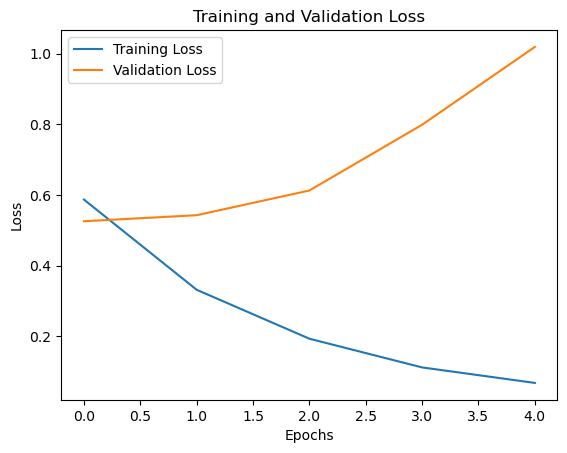

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

# Get training and validation loss from the history object
train_loss = hist_0.history['loss']
val_loss = hist_0.history['val_loss']

# Plot the training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The figure shows that the training loss decreases as the number of epochs increases, which means that the model is learning more from the training data. However, the validation loss keeps on fluctuating from one epoch to another epoch, which suggests that the model is not generalizing well to the new data (validation data). This could indicate overfitting to the training data.

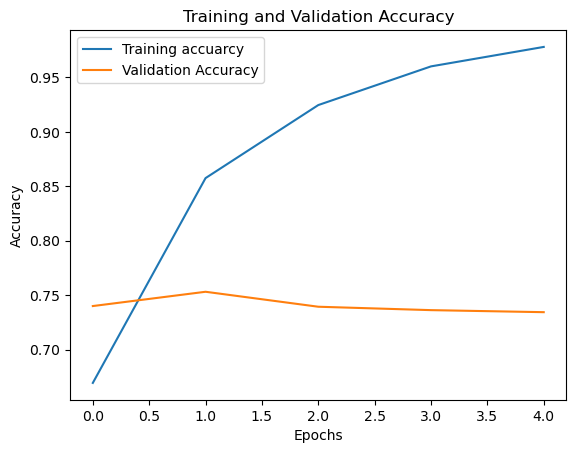

In [17]:
# Get training and validation loss from the history object
train_accuracy = hist_0.history['accuracy']
val_accuracy = hist_0.history['val_accuracy']

# Plot the training and validation accuracy
plt.plot(train_accuracy, label='Training accuarcy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Evaluate the Model

In [18]:
def loss_acc(model):
    loss, acc = model.evaluate(test_sentences, test_labels, verbose=1)
    print(f"Loss: {loss*100:.2f}%\nAccuracy: {acc*100:.2f}%")
    y_pred = model.predict(test_sentences)
    y_pred = np.round(y_pred).flatten()
    print(classification_report(test_labels, y_pred))

This function, **loss_acc(model)**, evaluates the model's performance on the test data and prints the loss, accuracy, and classification report.

* The **evaluate** method of the model object is used to calculate the loss and accuracy on the test data.


* The predicted labels for the test data are obtained using the **predict** method of the model object.


* The predicted labels are rounded and flattened to get binary values (0 or 1) using the **np.round** and **flatten88 functions, respectively.


* The **classification_report** function from sklearn.metrics is used to print a report of the model's performance on the test data, including precision, recall, and F1 score for each class (0 and 1).



This function can be used to evaluate the performance of the trained model on the test data and see how well it can generalize to new data.

In [19]:
loss_acc(model_0)

50/50 [==============================] - 0s 6ms/step - loss: 1.0193 - accuracy: 0.7344
Loss: 101.93%
Accuracy: 73.44%
50/50 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

           0       0.72      0.79      0.75       819
           1       0.76      0.67      0.71       781

    accuracy                           0.73      1600
   macro avg       0.74      0.73      0.73      1600
weighted avg       0.74      0.73      0.73      1600



Based on the provided results, the model achieved a test accuracy of 73.44% and a test loss of 1.02. The precision, recall, and f1-score for both classes (0 and 1) are also provided in the classification report.

The precision measures the proportion of correctly predicted positive (1) or negative (0) instances out of the total predicted instances for that class. The recall measures the proportion of correctly predicted positive or negative instances out of the total actual instances for that class. The f1-score is a metric that combines precision and recall, giving an overall measure of the model's performance.

In this case, the model has achieved relatively balanced precision, recall, and f1-scores for both classes, indicating that it is performing reasonably well for both positive and negative sentiments. However, the overall accuracy and f1-scores suggest that there is still room for improvement in the model's performance.

Further optimization and fine-tuning of the model, such as adjusting hyperparameters, trying different architectures, or increasing the training data, may help improve the model's performance.

## Results and Predictions

In [20]:
# Make predictions on the test set
test_predictions = model_0.predict(test_sentences)

# Convert probabilities to class labels (0 or 1)
test_predictions = [1 if pred >= 0.5 else 0 for pred in test_predictions]

# Print some example predictions
for i in range(10):
    print(f"Text: {test_sentences[i]}")
    print(f"True label: {test_labels[i]}")
    print(f"Predicted label: {test_predictions[i]}\n")

50/50 [==============================] - 0s 7ms/step
Text: nothing sticks , really , except a lingering creepiness one feels from being dragged through a sad , sordid universe of guns , drugs , avarice and damaged dreams . 
True label: 0
Predicted label: 0

Text: two tedious acts light on great scares and a good surprise ending . 
True label: 0
Predicted label: 0

Text: it's a beautifully accomplished lyrical meditation on a bunch of despondent and vulnerable characters living in the renown chelsea hotel . . . 
True label: 1
Predicted label: 1

Text: lan yu seems altogether too slight to be called any kind of masterpiece . it is , however , a completely honest , open-hearted film that should appeal to anyone willing to succumb to it . 
True label: 1
Predicted label: 0

Text: kim ki-deok seems to have in mind an ( emotionally at least ) adolescent audience demanding regular shocks and bouts of barely defensible sexual violence to keep it interested . 
True label: 0
Predicted label: 0

T

## Conclusion


Looking at the sample predictions on the test set, the model seems to perform reasonably well. However, there are some cases where the model predicted the wrong label, such as the fourth example where the true label is 1 but the model predicted 0. Further improvements could be made to the model to increase its accuracy and reduce the number of misclassifications like increasing the size of the model or fine-tuning the model or even experiment with different neural network architectures.